## Tutorial - Run Code on Real Datasets (Lake Erie)

#### The Lake Erie Data can be found in the Sample_Input folder. This data is a result of VHIP being run on samples from Lake Erie. The samples were originally collected to study cyanobacterial harmful algae blooms in the water. Harmful algal blooms are the rapid growth of algae or cyanobacteria in water that can harm people, animals, or the environment. Cyanobacterial harmful algae blooms (cHABs) are specific to freshwater and are characterized by their blue-green appearance. The data from Lake Erie was collected by AJ Wing and the analysis was run by Eric Bastien and Evelyn Faust. VHIP 2.0 aims to predict which viruses interact which hosts. The output is this prediction data from the site at varying time points. Moving forward, we hope to get access to data for a longer span of time and run this analysis on each of those additional time points. This will allow us to address another question: "How do patterns in predicted virus-host interactions change over time?". The expected results can be found in expected_output.ipynb.


#### Load the packages

In [158]:
%reload_ext autoreload
%autoreload 2

In [159]:
from VirusHostNetworkAnalysis.prediction_matrix import PredictionMatrix
from VirusHostNetworkAnalysis.null_model import ER
from VirusHostNetworkAnalysis.null_model import CM
from VirusHostNetworkAnalysis.visualize import Graph

In [160]:
aug4 = PredictionMatrix("Sample_Input/Aug4_predictions.tsv")
sep29 = PredictionMatrix("Sample_Input/Sep29_predictions.tsv")

#### Plot the heatmaps for the data from August 4th and September 29th to compare how it changed during that period.

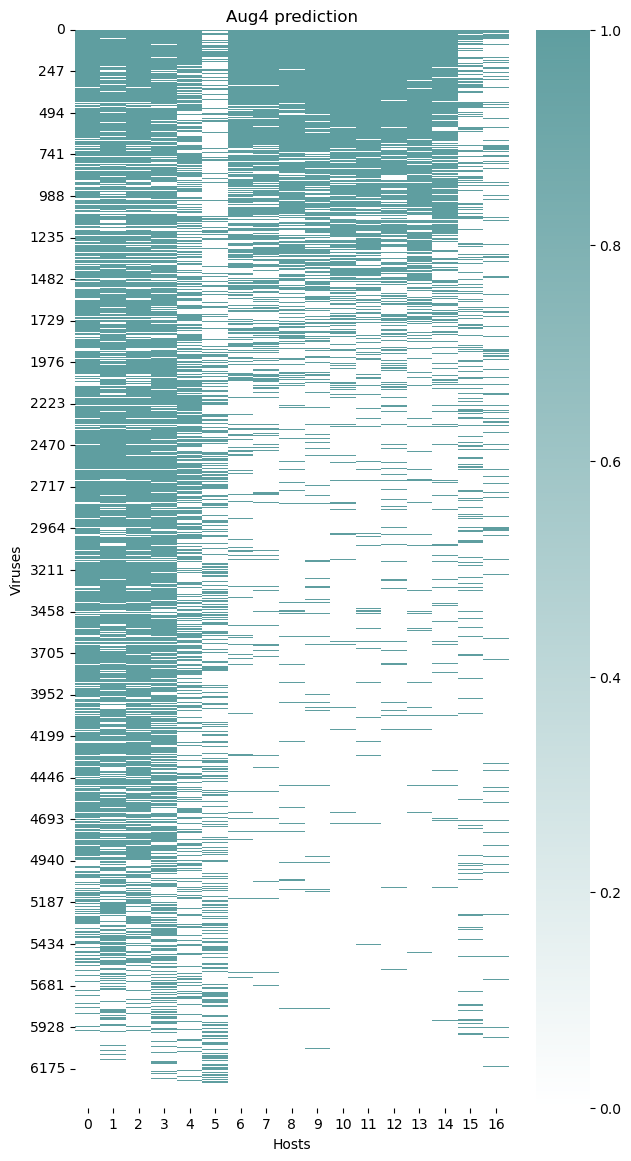

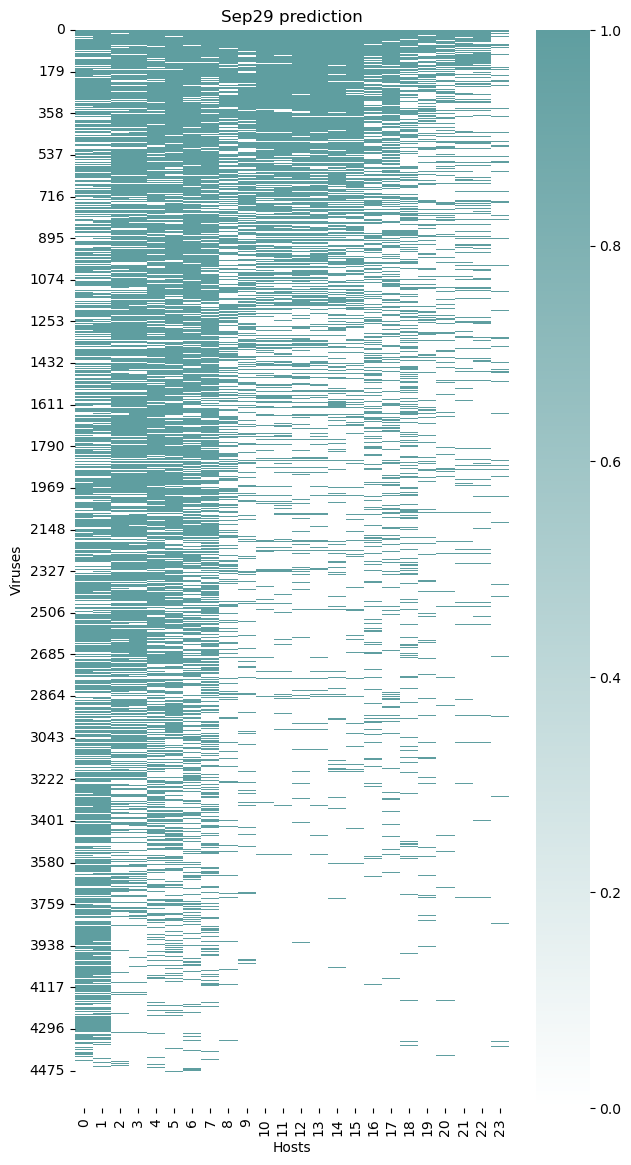

In [161]:
aug4.make_rectangular_matrix('prediction')
aug4.plot_heatmap('prediction')

sep29.make_rectangular_matrix('prediction')
sep29.plot_heatmap('prediction')

#### In the heatmaps above, there are some notable differences. First, the August data seems to have some modularity present (indicated by the gap at the top of column 5). This gap is not present in September. Instead, the September dataset appears to be mostly nested.

#### Make an edge list for each dataset.

In [162]:
aug4_edges = aug4.create_edge_list()
sep29_edges = sep29.create_edge_list()

Edge list created with 39419 edges.
Edge list created with 38977 edges.


#### Next, we will make ER and configuration models for the August and September data. This will serve as null models that can be compared to our actual graphs. Pass in the length of the viruses as row number, length of hosts as column number, and any desired p cutoff value. We will use 0.5 because this is the cutoff used for the VHIP analysis. This data is too large to display graphs for, so instead we will show the degree distributions.

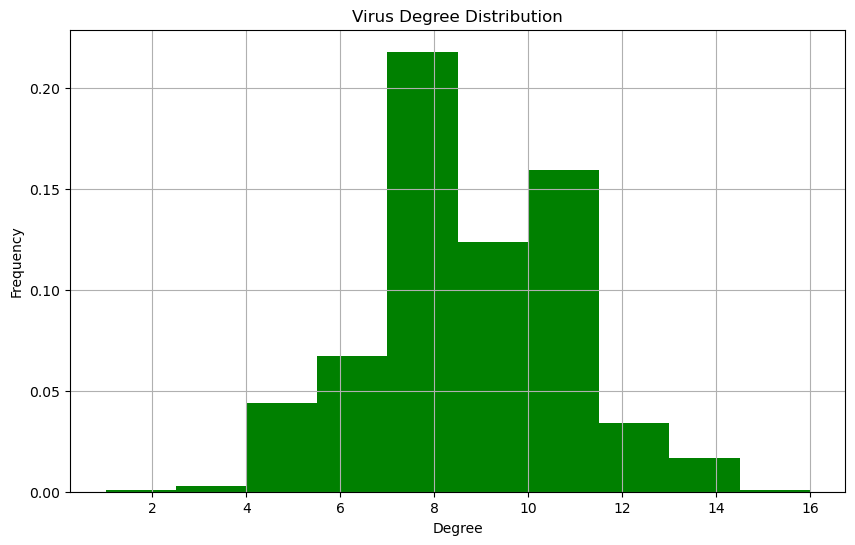

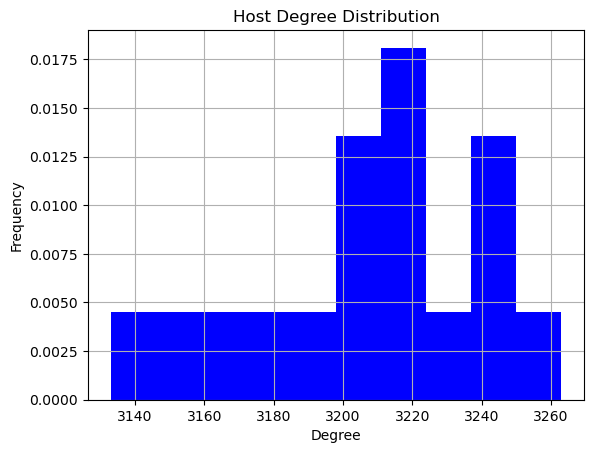

In [163]:
aug4_er = ER(len(aug4.unique_viruses), len(aug4.unique_hosts), 0.5)
aug4_er.fill_ER_graph()
aug4_er.create_edge_list()

aug4_er_graph = Graph(aug4_er.matrix_rand, aug4.unique_viruses, aug4.unique_hosts)
aug4_er_graph.degree_distribution(aug4_er.calculate_centrality())


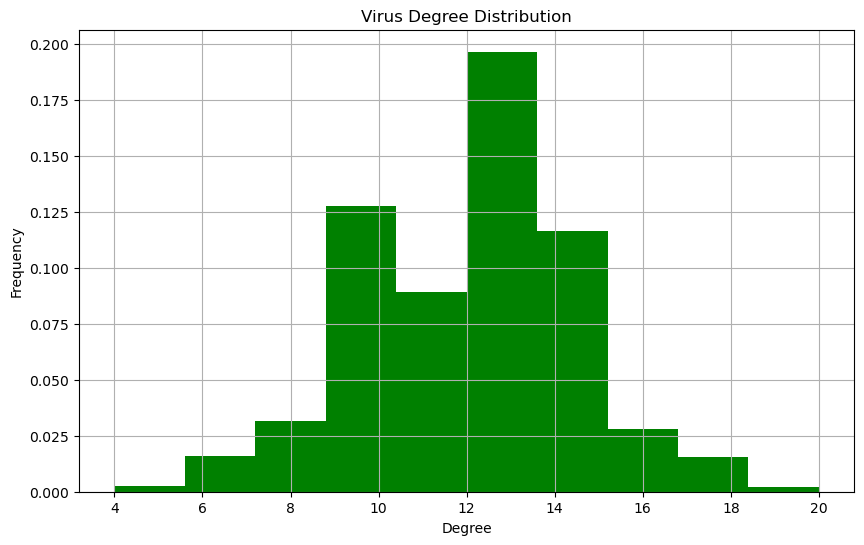

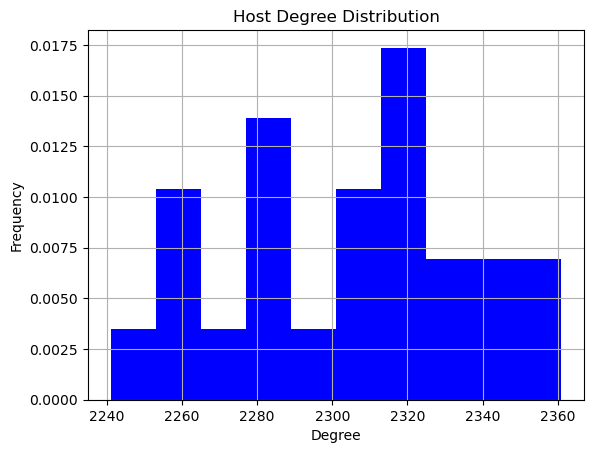

In [164]:
sep29_er = ER(len(sep29.unique_viruses), len(sep29.unique_hosts), 0.5)
sep29_er.fill_ER_graph()
sep29_er.create_edge_list()

sep29_er_graph = Graph(sep29_er.matrix_rand, sep29.unique_viruses, sep29.unique_hosts)
sep29_er_graph.degree_distribution(sep29_er.calculate_centrality())

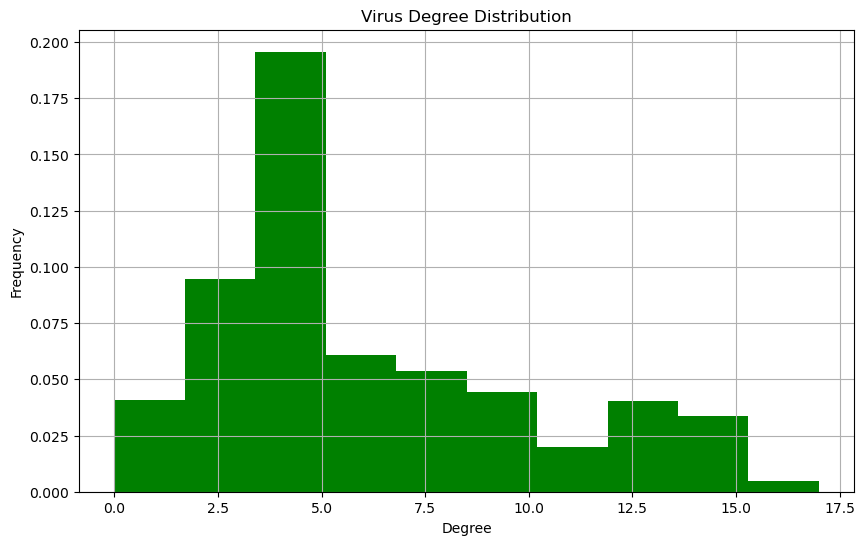

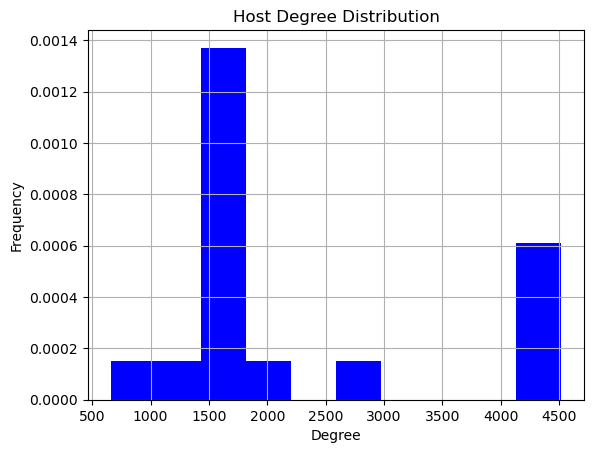

In [165]:
aug4_config = CM(aug4.virus_host_array)
aug4_degree_distribution = Graph(aug4_config.matrix_vhip, aug4.unique_viruses, aug4.unique_hosts)
aug4_degree_distribution.degree_distribution(aug4_config.bootstrap_stats(1000))


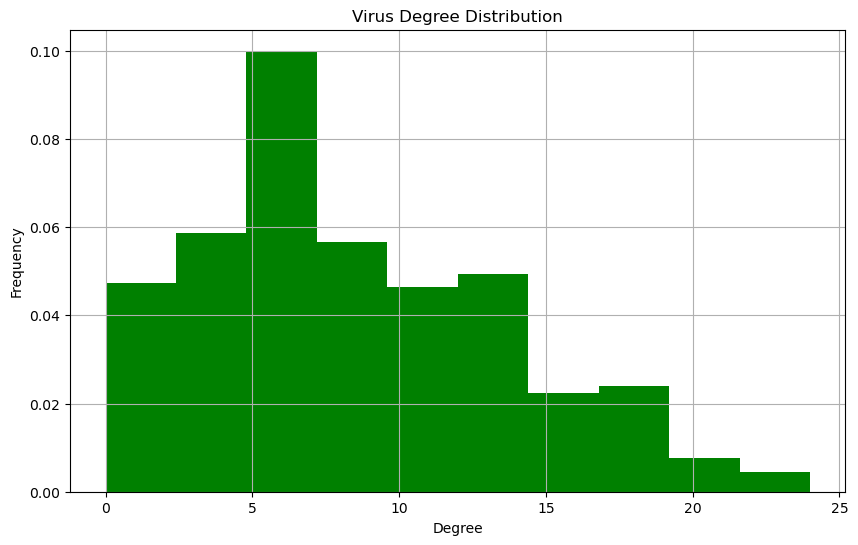

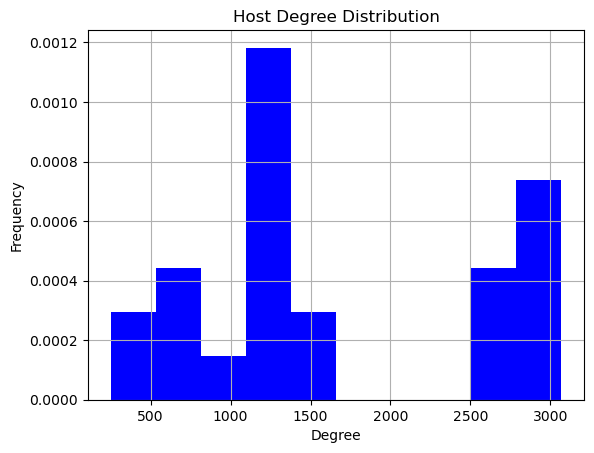

In [ ]:
sep29_config = CM(sep29.virus_host_array)
sep29_degree_distribution = Graph(sep29_config.matrix_vhip, sep29.unique_viruses, sep29.unique_hosts)
sep29_degree_distribution.degree_distribution(sep29_config.bootstrap_stats(1000))